In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import os
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = "6"
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
from keras.utils import plot_model
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
# ResNet50模型，加载预训练权重
model = ResNet50(weights='imagenet') 

In [28]:
img_path = 'E:/深度学习/2/inception-2015-12-05/images/elephant.jpg'          
img = image.load_img(img_path, target_size=(224, 224))

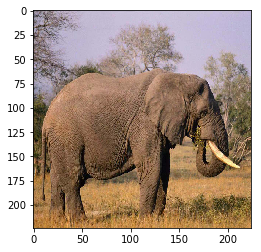

In [29]:
# 显示图片
plt.imshow(img)
plt.show()

In [30]:
#将图片转化为4d tensor形式
x = image.img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x = preprocess_input(x) #去均值中心化
# 测试数据
preds = model.predict(x)

(224, 224, 3)
(1, 224, 224, 3)


In [31]:
# 显示测试结果
print('Predicted:', decode_predictions(preds, top=5)[0])

Predicted: [('n02504458', 'African_elephant', 0.4998359), ('n01871265', 'tusker', 0.45786494), ('n02504013', 'Indian_elephant', 0.042246174), ('n01704323', 'triceratops', 1.4808651e-05), ('n02397096', 'warthog', 1.4353474e-05)]
